## Lab 8. Data Annotation Evaluation

Welcome to Lab 8! 

Today we will be looking at how to evaluate the goodness of the annotations made by the raters. We call it inter-annotator agreement, which measures how well two or more annotators can make the same annotation decision for a certain category.  Well known measures are percentage agreement, Cohen's Kappa, Fleiss' Kappa, Krippendorff's Alpha. High inter-annotator reliability values refer to a high degree of agreement between two or more raters. Low inter-rater reliability values refer to a low degree of agreement between two or more raters. 

__Questions:__
1. Why do we need to measure the reliability of the annotations? 
2. What could be the reason why annotators disagree? 
3. If we have two annotators and they both disagree on one sample, what class/label/etc should we use as the final class/label/etc? Should we prefer one annotator over the other? 
4. Why is it not a good idea to use percent agreement (no_of_agreements/total) to determine interrater reliability? 



### Cohen's Kappa 

[Cohen's kappa](https://en.wikipedia.org/wiki/Cohen%27s_kappa) ($\kappa$) is coefficient  that is used to measure inter-rater reliability for categorical items. 

$$\kappa = \frac{p_o-p_e}{1-p_e}=1-\frac{1-p_o}{1-p_e}$$
Here, $p_o$ is relative observed agreement among raters. $p_e$ is the hypothetical probability of chance agreement. When raters completely agree with each other then $\kappa=1$, if there is no agreement among the raters other than what would be expected by chance then $\kappa=0$. 

NB! Cohen's kappa measures agreement between two raters only. If there are more than two raters, we would have to use some other measure. 

<img src="https://miro.medium.com/max/700/1*-epOFf318-TTB70lvFejzA.png">

Image from [Medium](https://towardsdatascience.com/cohens-kappa-9786ceceab58)


Let's try to calculate Cohen's Kappa for our annotations. 


### Annotation Data

Let's first create some random and not so random annotation. For each case we have two annotators who classified samples into two classes - CORRECT and INCORRECT. We are going to calculate how reliabe the annotations are for both cases. 

In [ ]:
import random 
random_annotator1 = random.choices(['INCORRECT', 'CORRECT'], k=100)
random_annotator2 = random.choices(['INCORRECT', 'CORRECT'], k=100)


good_annotator1 = ['INCORRECT'] * 50 + ['CORRECT'] * 25 + ['INCORRECT'] * 5 + ['CORRECT'] * 20 
good_annotator2 = ['INCORRECT'] * 50 + ['CORRECT'] * 25 + ['INCORRECT'] * 5 + ['CORRECT'] * 15 + ['INCORRECT'] * 5 



Let's visualize the annotations using confusion matrix. With confusion matrix, we can see how much the annotators agreed and disagreed. 

In [ ]:
from sklearn.metrics import confusion_matrix 


In [ ]:
good_cm = confusion_matrix(good_annotator1, good_annotator2)
random_cm = confusion_matrix(random_annotator1, random_annotator2)

[Text(0, 0.5, 'CORRECT'), Text(0, 1.5, 'INCORRECT')]

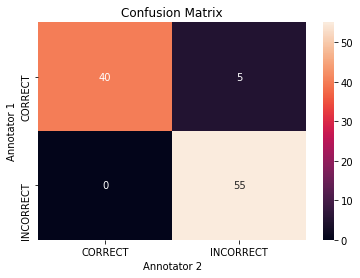

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(good_cm, annot=True, fmt='g', ax=ax); 


ax.set_xlabel('Annotator 2')
ax.set_ylabel('Annotator 1')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['CORRECT', 'INCORRECT'])
ax.yaxis.set_ticklabels(['CORRECT', 'INCORRECT'])

[Text(0, 0.5, 'CORRECT'), Text(0, 1.5, 'INCORRECT')]

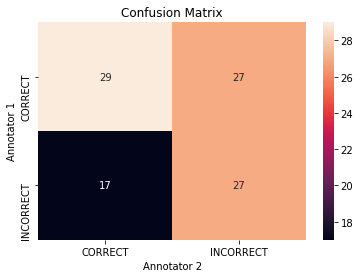

In [ ]:
ax= plt.subplot()
sns.heatmap(random_cm, annot=True, fmt='g', ax=ax); 


ax.set_xlabel('Annotator 2')
ax.set_ylabel('Annotator 1')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['CORRECT', 'INCORRECT'])
ax.yaxis.set_ticklabels(['CORRECT', 'INCORRECT'])

Let's first calculate the observed proportionate agreement $p_o$: 

$$p_o=\frac{\textrm{no in agreement}}{\textrm{total}}$$

In [ ]:
import numpy as np 
total = np.sum(random_cm)
random_p_o = (random_cm[0,0] + random_cm[1,1]) / total
random_p_o

0.56

In [ ]:
good_p_o = (good_cm[0,0]+ good_cm[1,1]) / total
good_p_o

0.95

Now, let's calculate the probability of random agreement $p_e$. We first need to calculate the probabilities for each class separately (the probability that both raters would annotate as the same class at random): 

In [ ]:
random_p_correct = ((random_cm[0,0] + random_cm[0,1]) / total) * ((random_cm[0,0]+ random_cm[1,0]) / total)
random_p_incorrect = ((random_cm[1,0] + random_cm[1,1]) / total) * ((random_cm[1,1]+ random_cm[0,1]) / total)
print(random_p_incorrect, random_p_correct)
random_p_e = random_p_correct + random_p_incorrect
print(random_p_e)

0.2376 0.25760000000000005
0.4952000000000001


In [ ]:
good_p_correct = ((good_cm[0,0] + good_cm[0,1]) / total) * ((good_cm[0,0] + good_cm[1,0]) /total)
good_p_incorrect = ((good_cm[1,0] + good_cm[1,1]) / total) * ((good_cm[1,1] + good_cm[0,1]) /total)
print(good_p_incorrect, good_p_correct)
good_p_e = good_p_correct + good_p_incorrect
print(good_p_e)

0.33 0.18000000000000002
0.51


Now, we can calculate $\kappa$: 

In [ ]:
random_kappa = (random_p_o-random_p_e)/(1-random_p_e)
print(random_kappa)

0.12836767036450075


In [ ]:
good_kappa = (good_p_o-good_p_e)/(1-good_p_e)
print(good_kappa)

0.8979591836734693


What can we say?  

| Kappa     | Agreement                  |
|-----------|----------------------------|
| < 0         | Less than chance agreement |
| 0.01-0.20 | Slight agreement           |
| 0.21-0.40 | Fair agreement             |
| 0.41-0.60 | Moderate agreement         |
| 0.61-0.80 | Substantial agreement      |
| 0.81-0.99 | Almost perfect agreement   |


We can make our lives easier by using NLTK's implementation of Cohen's Kappa. Here is how to do that. NLTK provides other inter-annotator agreement coefficients like Krippendorff's Alpha and Fleiss' Kappa. 

In [ ]:
from nltk.metrics.agreement import AnnotationTask

In [ ]:
random_data = []
for i, ann in enumerate(random_annotator1):
  random_data.append((str(1), str(i), ann))

for i, ann in enumerate(random_annotator2):
  random_data.append((str(2), str(i), ann))

In [ ]:
random_task = AnnotationTask(random_data)
random_task.kappa()

0.12836767036450075

In [ ]:
good_data = []
for i, ann in enumerate(good_annotator1):
  good_data.append((str(1), str(i), ann)) 

for i, ann in enumerate(good_annotator2):
  good_data.append((str(2), str(i), ann))

In [ ]:
good_task = AnnotationTask(good_data)
good_task.kappa()

0.8979591836734693